# Solution of an Example Problem in Perturbation Theory, Using Three Different Approaches in Sympy

以James Powell的 <a href=http://www.math.usu.edu/powell/math5410/pertexample1.html>Solution of an Example Problem in Perturbation Theory, Using Three Different Approaches in Maple</a> 為藍本改寫。相關的參考資料請看最底下的連結。

在求解之前，我們先設定顯示環境(sympy 0.7.4 版後可以有latex的顯示選項)，同時引入必要的模組：

In [6]:
import sympy
#if sympy.__version__ > "0.7.4":
#    from sympy.interactive import printing
#    printing.init_printing(use_latex=True)
#    from IPython.display import display

from sympy import *
from sympy.abc import t
from sympy.solvers import solve

In this section we will use Sympy to generate a power series solution to the differential equation

 $$\frac{\partial^2}{\partial t^2}u(t)-u(t) = \epsilon t u(t),\quad u(0)=1, u'(0)=-1.$$

The first step will be to write a candidate solution (called y(t) below) as a polynomial in t with eight terms and unknown coefficients $a(j)$ for each power  $t^j$

In [7]:
h = symbols('h')
deg = 8
an = symarray('an',(deg))
bn = symarray('bn',(deg))
anseries = sum( an[i] * h**i
         for i in range(deg) )
bnseries = sum( bn[i] * h**i
         for i in range(deg) )
display("an =",anseries)

'an ='

an_0 + an_1*h + an_2*h**2 + an_3*h**3 + an_4*h**4 + an_5*h**5 + an_6*h**6 + an_7*h**7

In [10]:
ph1 = sum((anseries*h)**(i)/factorial(i+1) for i in range(deg) )
display(ph1)

h**7*(an_0 + an_1*h + an_2*h**2 + an_3*h**3 + an_4*h**4 + an_5*h**5 + an_6*h**6 + an_7*h**7)**7/40320 + h**6*(an_0 + an_1*h + an_2*h**2 + an_3*h**3 + an_4*h**4 + an_5*h**5 + an_6*h**6 + an_7*h**7)**6/5040 + h**5*(an_0 + an_1*h + an_2*h**2 + an_3*h**3 + an_4*h**4 + an_5*h**5 + an_6*h**6 + an_7*h**7)**5/720 + h**4*(an_0 + an_1*h + an_2*h**2 + an_3*h**3 + an_4*h**4 + an_5*h**5 + an_6*h**6 + an_7*h**7)**4/120 + h**3*(an_0 + an_1*h + an_2*h**2 + an_3*h**3 + an_4*h**4 + an_5*h**5 + an_6*h**6 + an_7*h**7)**3/24 + h**2*(an_0 + an_1*h + an_2*h**2 + an_3*h**3 + an_4*h**4 + an_5*h**5 + an_6*h**6 + an_7*h**7)**2/6 + h*(an_0 + an_1*h + an_2*h**2 + an_3*h**3 + an_4*h**4 + an_5*h**5 + an_6*h**6 + an_7*h**7)/2 + 1

In [11]:
yn = symbols('yn')
ynew = yn + (h*ph1)*(anseries*yn+bnseries)
display(ynew)

h*(h**7*(an_0 + an_1*h + an_2*h**2 + an_3*h**3 + an_4*h**4 + an_5*h**5 + an_6*h**6 + an_7*h**7)**7/40320 + h**6*(an_0 + an_1*h + an_2*h**2 + an_3*h**3 + an_4*h**4 + an_5*h**5 + an_6*h**6 + an_7*h**7)**6/5040 + h**5*(an_0 + an_1*h + an_2*h**2 + an_3*h**3 + an_4*h**4 + an_5*h**5 + an_6*h**6 + an_7*h**7)**5/720 + h**4*(an_0 + an_1*h + an_2*h**2 + an_3*h**3 + an_4*h**4 + an_5*h**5 + an_6*h**6 + an_7*h**7)**4/120 + h**3*(an_0 + an_1*h + an_2*h**2 + an_3*h**3 + an_4*h**4 + an_5*h**5 + an_6*h**6 + an_7*h**7)**3/24 + h**2*(an_0 + an_1*h + an_2*h**2 + an_3*h**3 + an_4*h**4 + an_5*h**5 + an_6*h**6 + an_7*h**7)**2/6 + h*(an_0 + an_1*h + an_2*h**2 + an_3*h**3 + an_4*h**4 + an_5*h**5 + an_6*h**6 + an_7*h**7)/2 + 1)*(bn_0 + bn_1*h + bn_2*h**2 + bn_3*h**3 + bn_4*h**4 + bn_5*h**5 + bn_6*h**6 + bn_7*h**7 + yn*(an_0 + an_1*h + an_2*h**2 + an_3*h**3 + an_4*h**4 + an_5*h**5 + an_6*h**6 + an_7*h**7)) + yn

In [13]:
eq0 = ynew.subs(h,0)
print(eq0)

yn


In [14]:
dynew = diff(ynew,h)
eq1 = dynew.subs(h,0)
print(eq1)

an_0*yn + bn_0


In [15]:
d2ynew = diff(dynew,h)
eq2 = d2ynew.subs(h,0)
print(eq2)

an_0*(an_0*yn + bn_0) + 2*an_1*yn + 2*bn_1


In [20]:
d3ynew = diff(d2ynew,h)
eq3 = d3ynew.subs(h,0)
display(eq3)

3*an_0*(an_1*yn + bn_1) + 6*an_2*yn + 6*bn_2 + 3*(an_0**2/3 + an_1)*(an_0*yn + bn_0)

In [2]:
eps = symbols('eps')
deg = 8
a = symarray('a',(deg))

yt = sum( a[i] * t**i
         for i in range(deg) )
display("yt =",yt)

'yt ='

We now take calculate a derivative of y (just to see how it looks):

In [3]:
display("dydt =",diff(yt,t))

'dydt ='

The differential equation is written all on the Left Hand Side and evaluated with the power series assumption for y(t), generating a complicated polynomial expression:

In [4]:
eq = diff(yt,t,t)-yt-eps*t*yt
display("eq:",eq)

'eq:'

To get the leading order terms (coefficient of 1) we can simply substitute t=0 and save the resulting equation:

In [5]:
eq0 = eq.subs(t,0)
print "leading term:",eq0

leading term: -a_0 + 2*a_2


Remember that a(0) and a(1) are fixed by the initial conditions, so we need to solve eq0 to find a(2):

In [6]:
a2 = solve(eq0,a[2])
display("a_2 = ",a2[0])
eqnew = poly(eq,t).subs(a[2],a2[0])
asol = a
asol[2] = a2[0]

'a_2 = '

Now we are in a position to get the next equation. Here we do the it all in one step; eq1 is calculated by finding the coefficient of t to the first power in eq and then a(3) is defined to be the solution of that equation.

'a_3 = '

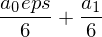

In [7]:
eq1 = eqnew.as_expr().coeff(t)
a3 = solve(eq1,a[3])
display("a_3 = ",a3[0])
eqnew = eqnew.subs(a[3],a3[0])
asol[3] = a3[0]

At this point we can see what pattern of commands we need to give. We will now proceed to solve for the next four coefficients of powers of t by defining equations as coefficients of t and then solving for the next unknown a(j).

'a_4 = '

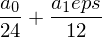

In [8]:
eq2 = eqnew.as_expr().coeff(t**2)  
a4 = solve(eq2,a[4])
display("a_4 = ",a4[0])
eqnew = eqnew.subs(a[4],a4[0])
asol[4] = a4[0]

'a_5 = '

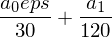

In [9]:
eq3 = eqnew.as_expr().coeff(t**3)
#print "eq3:",eq3
a5 = solve(eq3,a[5])
display("a_5 = ",a5[0])
eqnew = eqnew.subs(a[5],a5[0])
asol[5] = a5[0]


'a_6 = '

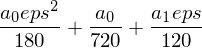

In [10]:
eq4 = eqnew.as_expr().coeff(t**4)
a6 = solve(eq4,a[6])
display("a_6 = ",a6[0])
eqnew = eqnew.subs(a[6],a6[0])
asol[6] = a6[0]

'a_7 = '

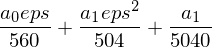

'asol'

array([a_0, a_1, a_0/2, a_0*eps/6 + a_1/6, a_0/24 + a_1*eps/12,
       a_0*eps/30 + a_1/120, a_0*eps**2/180 + a_0/720 + a_1*eps/120,
       a_0*eps/560 + a_1*eps**2/504 + a_1/5040], dtype=object)

In [11]:
eq5 = eqnew.as_expr().coeff(t**5)
a7 = solve(eq5,a[7])
display("a_7 = ",a7[0])
eqnew = eqnew.subs(a[7],a7[0])
asol[7] = a7[0]   

display("asol",asol)

Let's see what the solution looks like now. We will define ysol(t) to be the eight term, seventh order polynomial we have found:

'ysol'

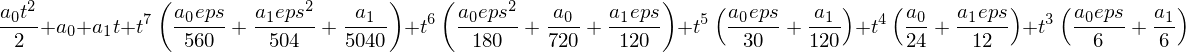

In [12]:
ysol = sum( asol[i] * t**i
         for i in range(deg) )

y0 = ysol.subs(a[1],0)
#print "y0",y0
y1 = ysol.subs(a[0],0)
#print "y1",y1
display("ysol",ysol)

##### Plotting The Results

In [13]:
## Plotting The Results
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x_t = np.linspace(0, 7, 50)
y_t = ysol.subs([(a[0],1),(a[1],-1),(eps,0.04)])
f_t = lambdify(t, y_t,modules=['numpy'])


以上是在進行準備工作，其中 "%matplotlib inline" 是讓matplotlib產生的圖可以在ipython notebook中顯示。
以下開始畫圖，設定要畫的的x,y數據list....，最後的 "plt.show()" 才會產生圖

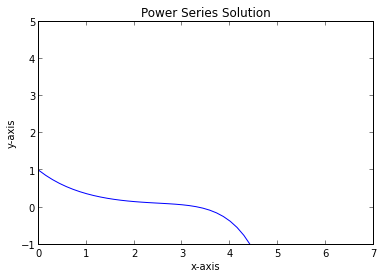

In [14]:
plt.plot(x_t,f_t(x_t)) 
#
#    # 設定圖的範圍, 不設的話，系統會自行決定
plt.xlim(0,7) 
plt.ylim(-1,5)
#    # 照需要寫入x 軸和y軸的 label 以及title
#
plt.xlabel("x-axis")   
plt.ylabel("y-axis")   
plt.title("Power Series Solution") 
#    # 在這個指令之前，都還在做畫圖的動作 
#    # 這個指令算是 "秀圖" 
plt.show() 

## Perturbation Solution

在這個小節，我們將使用regular perturbation theory解前述微分方程。首先我們將u0、u1、u2都設成函數（symbolic)，同時將perturbed solution, ut代入方程式

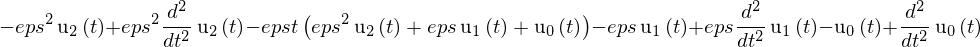

In [15]:
u0 = Function('u0')
u1 = Function('u1')
u2 = Function('u2')
ut = Function('ut')
ut = u0(t)+eps*u1(t)+eps**2*u2(t)

display(ut)
eqpert = diff(ut,t,t)-ut-eps*t*ut 
display(eqpert)

To get the zeroth order perturbation equation we just substitute  epsilon = 0 into the governing equation and save the result as the variable eqp0:

'leading term:'

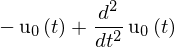

In [16]:
eqp0 = eqpert.subs(eps,0)
display("leading term:",eqp0)

To get the first order (in  epsilon ) equation we can take the first derivative of eqpert, with respect to  epsilon , and substitute  epsilon = 0 into the result to give the first order perturbation equation, which we will save as a variable `epq1'.

'first order:'

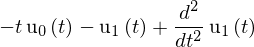

In [17]:
eqp1 = diff(eqpert,eps).subs(eps,0)
display("first order:",eqp1)

Now the beat roles on; to find the second order equation we take two derivatives and evaluate at  epsilon = 0 ; the factor of 1/2 is just because of the division by 2 factorial in the Maclaurin expansion.

'Second order:'

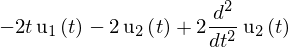

In [18]:
eqp2 = diff(eqpert,eps,eps).subs(eps,0)
display("Second order:",eqp2)

Knowing the perturbation equations we can begin to determine the solutions. Using the command dsolve to solve the zeroth order equation gives a general solution

In [19]:
from sympy import dsolve
dsolve(eqp0,u0(t))

Manually solve the equation with initial conditions, $u0(0)=1$, $u0'(0)=-1$ and we have

In [20]:
C1,C2 = symbols('C1 C2')
u0g = C1*exp(t) + C2*exp(-t)
coef=solve([Eq(u0g.subs(t,0),1),Eq(diff(u0g,t).subs(t,0),-1)],[C1,C2])
u0sol = u0g.subs([(C1,coef.get(C1)),(C2,coef.get(C2))])
display("u0sol",u0sol)

'u0sol'

At the next order, solving for the first correction term, $u1(t)$, generates the following function:

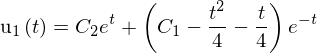

In [21]:
dsolve(eqp1.subs(u0(t),u0sol),u1(t))

Since the initial conditions are included previously, the initial data will be zero.

'u1sol'

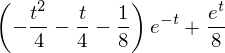

In [22]:
u1g = C1*exp(t) + (C2 - t**2/4 - t/4)*exp(-t)
coef=solve([Eq(u1g.subs(t,0),0),Eq(diff(u1g,t).subs(t,0),0)],[C1,C2])
u1sol = u1g.subs([(C1,coef.get(C1)),(C2,coef.get(C2))])
display("u1sol",u1sol)

Solving for the second order correction (that is, order  $\epsilon^2$ ) gives the kind of function that makes us happy to be using Sympy:

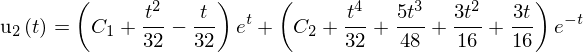

In [23]:
dsolve(eqp2.subs(u1(t),u1sol),u2(t))

Since the initial conditions are included previously, the initial data will be zero.

'u2sol'

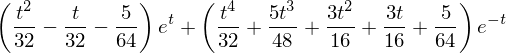

In [24]:
u2g = (C1 + t**2/32 - t/32)*exp(t) + (C2 + t**4/32 + 5*t**3/48 + 3*t**2/16 + 3*t/16)*exp(-t)
coef=solve([Eq(u2g.subs(t,0),0),Eq(diff(u2g,t).subs(t,0),0)],[C1,C2])
u2sol = u2g.subs([(C1,coef.get(C1)),(C2,coef.get(C2))])
display("u2sol",u2sol)

These solutions can now be substituted back into the original perturbation ansatz to give our approximate asymptotic solution

'Solution'

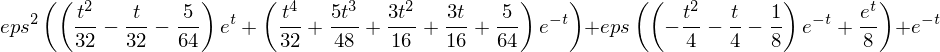

In [25]:
upert = ut.subs([(u0(t),u0sol),(u1(t),u1sol),(u2(t),u2sol)])
display("Solution",upert)

底下是Perturbation Solution的圖形，繪圖過程含前面級數解的部份相同。

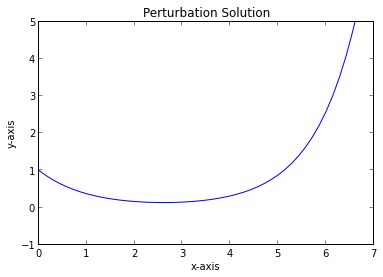

In [26]:
x_pert = np.linspace(0, 7, 50)
y_pert = upert.subs([(eps,0.04)])
f_pert = lambdify(t, y_pert,modules=['numpy'])
plt.plot(x_pert,f_pert(x_pert)) 
#
#    # 設定圖的範圍, 不設的話，系統會自行決定
plt.xlim(0,7) 
plt.ylim(-1,5)
#    # 照需要寫入x 軸和y軸的 label 以及title
#
plt.xlabel("x-axis")   
plt.ylabel("y-axis")   
plt.title("Perturbation Solution") 
#    # 在這個指令之前，都還在做畫圖的動作 
#    # 這個指令算是 "秀圖" 
plt.show() 

## Numerical Solution

在這個小節，我們將以scipy模組，以數值方法對微分方程求解。作法是先定義一函數(un)表示first order微分方程系統，之後再以odeint數值積分：

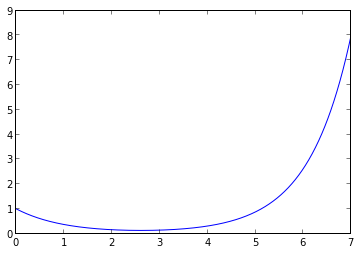

In [27]:
from scipy.integrate import odeint

epsilon = 0.04

def un(z,tt):
    x,y=z[0],z[1]
    dxdt= y
    dydt= (1.0+epsilon*tt)*x
    return [dxdt,dydt]

tt=np.linspace(0, 7, 1000)
x0,y0=1.0,-1.0
sol=odeint(un,[x0,y0],tt)
Xn,Yn=sol[:,0],sol[:,1]
plt.plot(tt,Xn)
plt.show() 

#### Solve the perturbed ODE using dsolve

我們可以試著直接以dsolve對微分方程求解

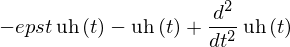

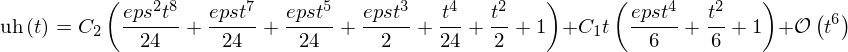

In [28]:
uh = Function('uh')
meqpert = diff(uh(t),t,t)-uh(t)-eps*t*uh(t)
display(meqpert)
dsolve(meqpert,uh(t))

由於sympy無法得到closed-form solution，所以dsolve應該是以級數解求解

## Comparing the Three Results

Now we are in position to show all three graphs calculated above on one set of axes. Here we will plot the results for t running from 0 to 7 (as above) and set the horizontal window to display between -1 and 5. Also we will label the axes to get full style points from our professor.

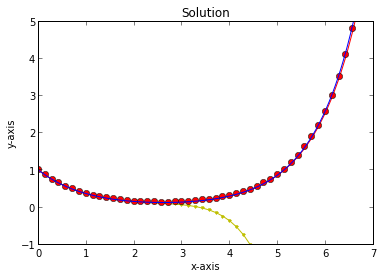

In [29]:
# Power Series Solution
plt.plot(x_t,f_t(x_t),'y.-') 
#Perturbation Solution
plt.plot(x_pert,f_pert(x_pert),'ro-')
#Numerical Solution
plt.plot(tt,Xn,'b-') 
#
#    # 設定圖的範圍, 不設的話，系統會自行決定
plt.xlim(0,7) 
plt.ylim(-1,5)
#    # 照需要寫入x 軸和y軸的 label 以及title
#
plt.xlabel("x-axis")   
plt.ylabel("y-axis")   
plt.title("Solution") 
plt.show() 

In the graph above the color blue denotes the numerical solution, the color green denotes the perturbation series solution, and the color red denotes the power series (polynomial in t) solution. All three agree rather well up to t=2.4, after which the polynomial solution diverges drastically. By comparison, the the asymptotic perturbation solution is basically indistinguishable until after t=5 or so, and even after that it is still behaving properly!

<li> iPython 的 Notebook可以參考：
http://yenlungblog.wordpress.com/2013/11/21/python-ipython-%E7%9A%84-notebook-%E7%95%8C%E9%9D%A2/</li>
<li> sympy可以參考：
http://www.gtwang.org/2012/12/sympy1.html </li>
<li> 繪圖指令請參考：
http://onionys.blogspot.tw/2012/01/python-matplotlib.html </li>
<li>更多的matplotlib：
    http://nbviewer.ipython.org/github/c3h3/NCCU-PyData-Courses-2013Spring/blob/master/Lecture4/visualization/BasicMatplotlib.ipynb</li>
<li> 於window中安裝python請參考：
http://nbviewer.ipython.org/github/ycshu/Github/blob/master/introduction.ipynb </li>